<a href="https://colab.research.google.com/github/hemantkashniyal/EVA4/blob/master/notebooks/Session8/Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pwd

import torch
print(torch.cuda.is_available())

! git clone https://github.com/hemantkashniyal/EVA4.git || true
! git -C EVA4 pull
! rm -rf eva4
! cp -r /content/EVA4/notebooks/Session8/* .

/content
True
fatal: destination path 'EVA4' already exists and is not an empty directory.
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/hemantkashniyal/EVA4
   ea17180..7fa2878  master     -> origin/master
Updating ea17180..7fa2878
Fast-forward
 notebooks/Session8/eva4/training/training_manager.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [12]:
%env PYTHONDONTWRITEBYTECODE=true
! pip install -r requirements.txt
    

env: PYTHONDONTWRITEBYTECODE=true


In [13]:
%matplotlib inline

import json
from torchsummary import summary
from environs import Env

from torchvision import datasets, transforms
from eva4.config.config import TrainingConfig
env = Env()
env.read_env("./cifar10.experiment.env.txt", recurse=False)

config = TrainingConfig()
TrainingConfig.print(config)

Config:  {
    "cuda_available": true,
    "device": "cuda",
    "epochs": 100,
    "desired_accuracy": 80.0,
    "break_on_reaching_desired_accuracy": true,
    "consecutive_desired_accuracy": 3,
    "dataset": {
        "type": "CIFAR10",
        "dataset_root": "./data",
        "batch_size": 512,
        "shuffle": true,
        "num_workers": 4,
        "pin_memory": true,
        "input_size": [
            3,
            32,
            32
        ],
        "input_channel": 3,
        "input_dimension": [
            32,
            32
        ],
        "dataset_std": [
            0.247,
            0.2435,
            0.2616
        ],
        "dataset_mean": [
            0.4914,
            0.4822,
            0.4465
        ]
    },
    "scheduler": {
        "type": "MultiStepLR",
        "milestones": [
            10,
            20,
            35,
            50
        ],
        "gamma": 0.1
    },
    "optimizer": {
        "type": "SGD",
        "learning_rate": 

In [0]:
from imageaug.transforms import Colorspace, RandomAdjustment, RandomRotatedCrop

input_size = config.dataset.input_size
crop_size = config.dataset.input_dimension
angle_std = 7 # in degrees

dataset_std = config.dataset.dataset_std
dataset_mean = config.dataset.dataset_mean

# Define training transforms
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(dataset_mean, dataset_std),
])
train_transforms = None

# Define test transforms
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(dataset_mean, dataset_std),
])
test_transforms = None

In [15]:
from eva4.dataset.dataset_manager import DatasetManager

TrainingConfig.print(config.dataset)
dataset = DatasetManager.get_dataset(config.dataset, train_transforms, test_transforms)


Config:  {
    "type": "CIFAR10",
    "dataset_root": "./data",
    "batch_size": 512,
    "shuffle": true,
    "num_workers": 4,
    "pin_memory": true,
    "input_size": [
        3,
        32,
        32
    ],
    "input_channel": 3,
    "input_dimension": [
        32,
        32
    ],
    "dataset_std": [
        0.247,
        0.2435,
        0.2616
    ],
    "dataset_mean": [
        0.4914,
        0.4822,
        0.4465
    ]
}
Files already downloaded and verified
Files already downloaded and verified


In [16]:
from eva4.network.network_manager import NetworkManager

from eva4.network.cifar10.cifar10 import CIFAR10Net
network = CIFAR10Net(config.network).to(config.device)

TrainingConfig.print(config.network)
NetworkManager.summarize(network, config.network, config.dataset)


Config:  {
    "dropout": 0.1,
    "bias_enabled": true,
    "input_channel": 3
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
     InternalBlock-5           [-1, 16, 32, 32]               0
            Conv2d-6           [-1, 32, 32, 32]           4,608
              ReLU-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
           Dropout-9           [-1, 32, 32, 32]               0
    InternalBlock-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 30, 30]          18,432
             ReLU-12           [-1, 64, 30, 30]               0
      BatchNorm2d-13 

/content/eva4/network/cifar10/cifar10.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [17]:
from eva4.optimizer.optimizer_manager import OptimizerManager
TrainingConfig.print(config.optimizer)
optimizer = OptimizerManager.get_optimizer(network, config.optimizer)


Config:  {
    "type": "SGD",
    "learning_rate": 0.1,
    "momentum": 0.9
}


In [18]:
from eva4.scheduler.scheduler_manager import SchedulerManager
TrainingConfig.print(config.scheduler)
scheduler = SchedulerManager.get_scheduler(optimizer, config.scheduler)


Config:  {
    "type": "MultiStepLR",
    "milestones": [
        10,
        20,
        35,
        50
    ],
    "gamma": 0.1
}


In [19]:
import torch.nn.functional as F
loss = F.nll_loss

import torch.nn as nn
nn.CrossEntropyLoss

torch.nn.modules.loss.CrossEntropyLoss

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


/content/eva4/network/cifar10/cifar10.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=1.3260815143585205 Batch_id=97 Accuracy=40.04: 100%|██████████| 98/98 [00:18<00:00,  5.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4650, Accuracy: 23104/50000 (46.21%)

EPOCH: 1


Loss=1.099462866783142 Batch_id=97 Accuracy=58.54: 100%|██████████| 98/98 [00:18<00:00,  5.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2829, Accuracy: 27556/50000 (55.11%)

EPOCH: 2


Loss=0.8922934532165527 Batch_id=97 Accuracy=66.08: 100%|██████████| 98/98 [00:18<00:00,  5.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8811, Accuracy: 34201/50000 (68.40%)

EPOCH: 3


Loss=0.797603964805603 Batch_id=97 Accuracy=71.01: 100%|██████████| 98/98 [00:19<00:00,  5.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7370, Accuracy: 37136/50000 (74.27%)

EPOCH: 4


Loss=0.7592656016349792 Batch_id=97 Accuracy=74.61: 100%|██████████| 98/98 [00:18<00:00,  5.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7492, Accuracy: 36926/50000 (73.85%)

EPOCH: 5


Loss=0.7340247631072998 Batch_id=97 Accuracy=76.89: 100%|██████████| 98/98 [00:18<00:00,  5.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6273, Accuracy: 39019/50000 (78.04%)

EPOCH: 6


Loss=0.5379575490951538 Batch_id=97 Accuracy=78.77: 100%|██████████| 98/98 [00:18<00:00,  5.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6056, Accuracy: 39068/50000 (78.14%)

EPOCH: 7


Loss=0.5604822635650635 Batch_id=97 Accuracy=80.27: 100%|██████████| 98/98 [00:18<00:00,  5.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5237, Accuracy: 40702/50000 (81.40%)

EPOCH: 8


Loss=0.6167202591896057 Batch_id=97 Accuracy=81.31: 100%|██████████| 98/98 [00:19<00:00,  5.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4483, Accuracy: 42175/50000 (84.35%)

EPOCH: 9


Loss=0.4270199239253998 Batch_id=97 Accuracy=82.39: 100%|██████████| 98/98 [00:18<00:00,  5.94it/s]



Test set: Average loss: 0.5022, Accuracy: 41261/50000 (82.52%)



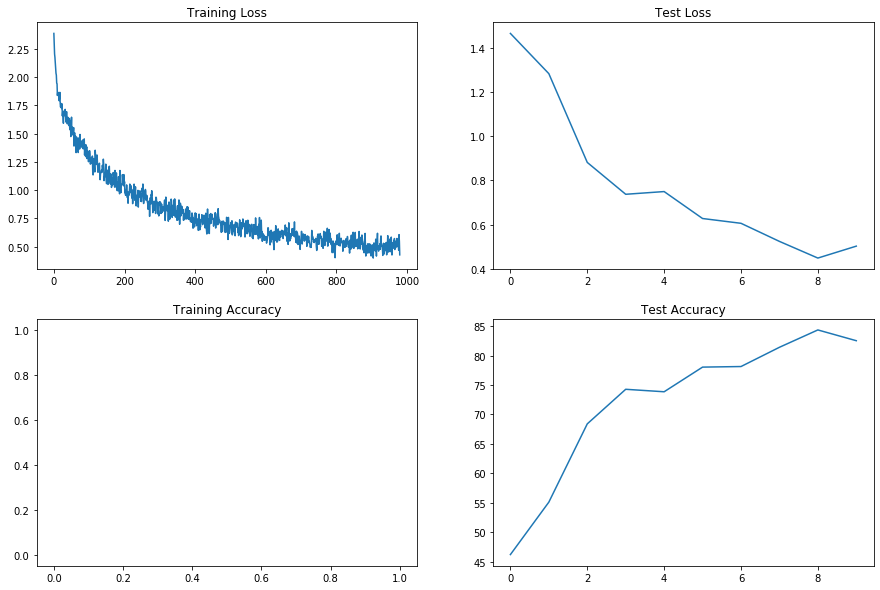

In [20]:
from eva4.training.training_manager import TrainingManager
training = TrainingManager(config, dataset, network, loss, scheduler, optimizer)
training.start()
training.summarize()
